Name: Sumanasekara W.K.G.G. 

Index: 190610E

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

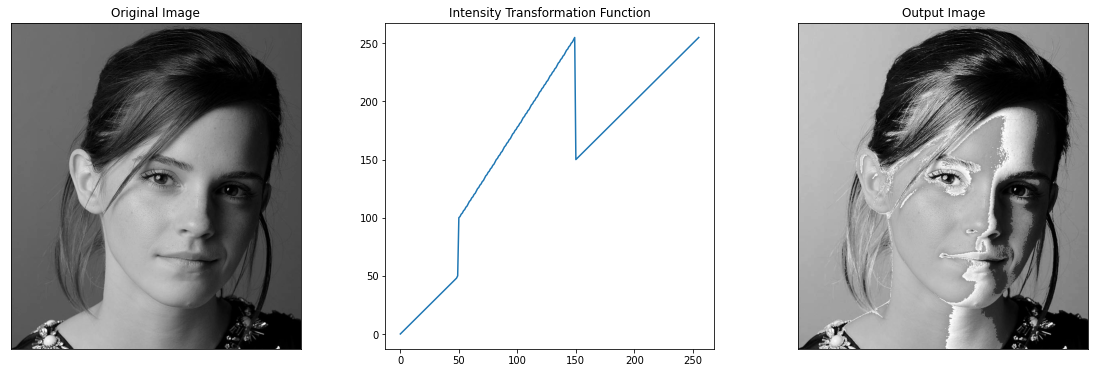

In [7]:
# Question 1
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)

fig1 = cv.imread(r"Images/emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert fig1 is not None
fig1_transformed = cv.LUT(fig1, transform1)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(fig1, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig1_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.savefig(r"Report/Images/1.jpg")

plt.show()

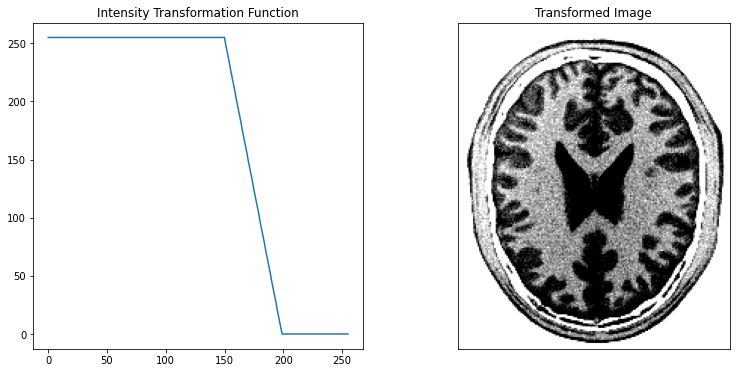

In [2]:
# Question 2-a
transform2 = np.concatenate((np.linspace(255, 255, 150), np.linspace(255, 0, 50), np.linspace(0, 0, 56)), axis=0).astype(np.uint8)
fig2 = cv.imread("Images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform2)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Transformed Image")
plt.savefig(r"Report/Images/2a.jpg")

plt.show()

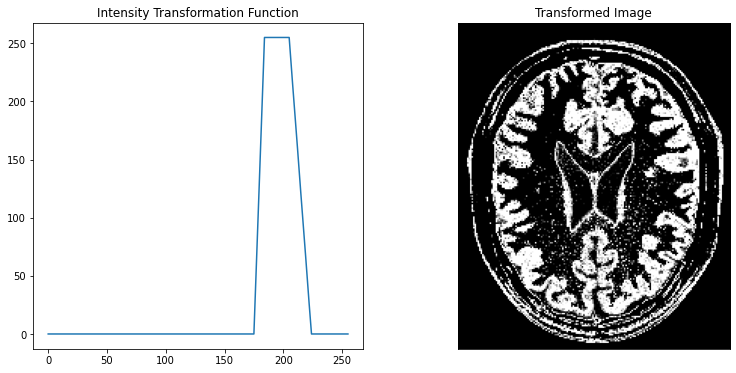

In [4]:
# Question 2-b
transform3 = np.concatenate((np.linspace(0, 0, 175), np.linspace(0, 255, 10), np.linspace(255, 255, 20), np.linspace(255, 0, 20), np.linspace(0, 0, 31)), axis=0).astype(np.uint8)

fig2_transformed_2 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_2, cmap="gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Transformed Image")
plt.savefig(r"Report/Images/2b.jpg")

plt.show()

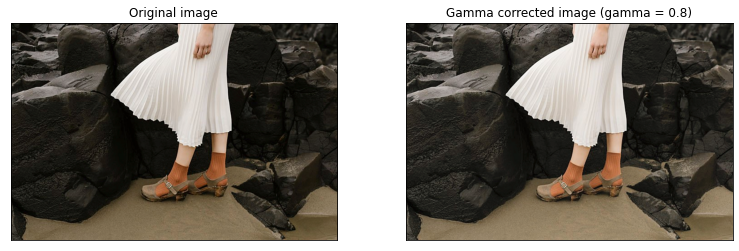

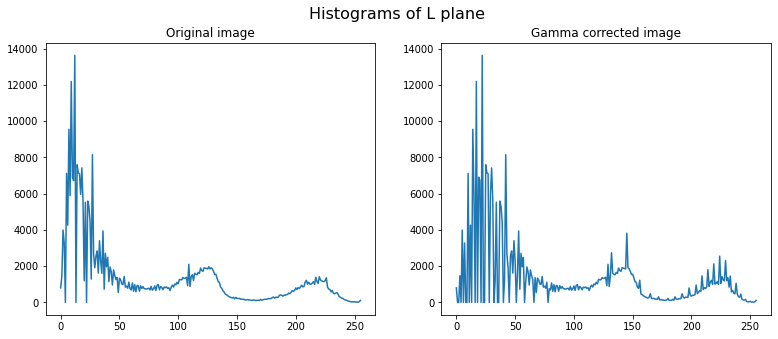

In [10]:
# Question 3
gamma = 0.8

fig3 = cv.imread(r"Images/highlights_and_shadows.jpg")
assert fig3 is not None
fig3 = cv.cvtColor(fig3, cv.COLOR_BGR2Lab)
fig3_rbg = cv.cvtColor(fig3, cv.COLOR_Lab2RGB)
original_hist = cv.calcHist([fig3], [0], None, [256], [0, 256])
transform4 = np.array([((i/255)**gamma)*255 for i in range(256)]).astype(np.uint8)
fig3[:,:,0] = cv.LUT(fig3[:,:,0], transform4)
transformed_hist = cv.calcHist([fig3], [0], None, [256], [0, 256])
fig3 = cv.cvtColor(fig3, cv.COLOR_Lab2RGB)

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].imshow(fig3_rbg)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original image")
ax[1].imshow(fig3)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Gamma corrected image (gamma = "+str(gamma)+")")
plt.savefig(r"Report/Images/31.jpg")
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Histograms of L plane', fontsize=16)
ax[0].plot(original_hist)
ax[0].set_title("Original image")
ax[1].plot(transformed_hist)
ax[1].set_title("Gamma corrected image")
plt.savefig(r"Report/Images/32.jpg")
plt.show()

In [37]:
# Question 4

def equalizeHist(img):
    hist = np.histogram(img.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = np.ma.masked_equal(cdf,0)
    cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
    cdf = np.ma.filled(cdf,0).astype('uint8')
    img_equatized = cv.LUT(img, cdf)

    return img_equatized

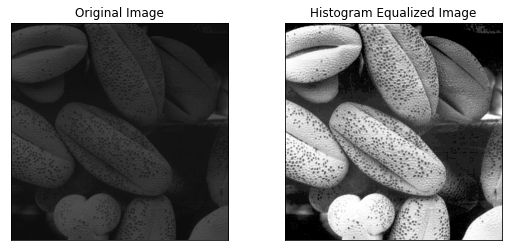

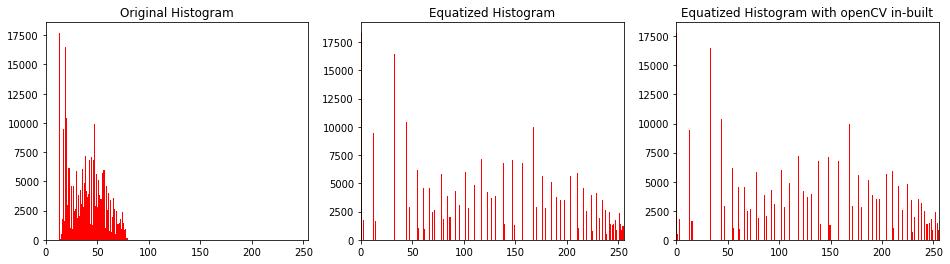

In [38]:
# Question 4

fig4 = cv.imread("Images\shells.png", cv.IMREAD_GRAYSCALE)
assert fig4 is not None

fig4_equatized = equalizeHist(fig4)
fig4_equatized_inbuilt = cv.equalizeHist(fig4)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].imshow(fig4, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].imshow(fig4_equatized, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Histogram Equalized Image")
plt.savefig(r"Report/Images/41.jpg")

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].hist(fig4.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0, 255])
ax[0].set_title("Original Histogram")
ax[1].hist(fig4_equatized.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0, 255])
ax[1].set_title("Equatized Histogram")
ax[2].hist(fig4_equatized_inbuilt.flatten(),256,[0,256], color = 'r')
ax[2].set_xlim([0, 255])
ax[2].set_title("Equatized Histogram with openCV in-built")
plt.savefig(r"Report/Images/42.jpg")

plt.show()

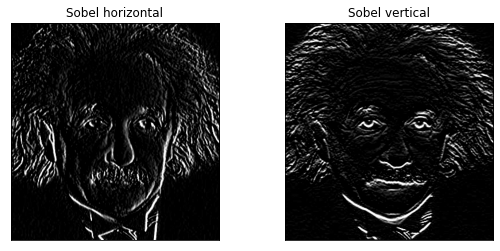

In [13]:
# Q5

fig_einstein = cv.imread("Images\einstein.png", cv.IMREAD_GRAYSCALE)
assert fig_einstein is not None

sobel_horizontal = np.array(((1, 0, -1), (2, 0, -2), (1, 0, -1)))
sobel_vertical = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)))
horizontally_filtered = cv.filter2D(fig_einstein, -1, sobel_horizontal)
verically_filtered = cv.filter2D(fig_einstein, -1, sobel_vertical)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(horizontally_filtered, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Sobel horizontal")
ax[1].imshow(verically_filtered, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Sobel vertical")
plt.savefig(r"Report/Images/51.jpg")

plt.show()
